In [ ]:
# 랜덤숫자 생성
import random

In [ ]:
# 이미지 처리
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
# json 파일 다루기
import json

In [ ]:
# 파일 존재 여부 확인용
import os

In [ ]:
# 훈련용 데이터와 검증용 데이터 분리
from sklearn.model_selection import train_test_split

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 변수 목록

In [ ]:
# 사용할 이미지 개수
img_file_size = 250

# 크기 조정 사이즈
res_width = 200
res_height = 200

ori_img_dir_name = "./Dataset/Original/Female/Image/Hip-hop/" # 원본 이미지 파일이 존재하는 디릭토리명
ori_json_dir_name = "./Dataset/Original/Female/Json/Hip-hop/" # 원본 json 파일이 존재하는 디렉토리명

train_dir_name = "./Dataset/Train-Validation/Female/Train/" # Train 데이터를 저장할 디렉토리명
val_dir_name = "./Dataset/Train-Validation/Female/Validation/" # Validation 데이터를 저장할 디렉토리명

In [ ]:
# train_save_point = 6666
# val_save_point = 1670

In [ ]:
train_save_point = train_end_point
val_save_point = val_end_point

print(train_save_point)
print(val_save_point)

7798
1954


# 데이터 불러오기

In [ ]:
dataset_list = []

while (len(dataset_list) < img_file_size):
    # 랜덤 정수 생성
    rand_num = random.randint(1, 1928)

    img_path = ori_img_dir_name + str(rand_num) + ".jpg"
    json_path = ori_json_dir_name + str(rand_num) + ".json"

    # 해당 숫자의 파일이 없으면 다음 숫자 뽑기
    if not os.path.isfile(img_path):
        continue
    if not os.path.isfile(json_path):
        continue

    tmp_list = []

    # 이미지 파일 로드
    img_file = cv2.imread(img_path)
    if img_file is None:
        print(str(rand_num) + ".jpg File Load Failed!!")
        break

    # json 파일 로드
    with open(json_path, "r") as loadfile:
        json_file = json.load(loadfile)
    if json_file is None:
        print(str(rand_num) + ".json File Load Failed!!")
        break

    tmp_list.append(img_file)
    tmp_list.append(json_file)

    dataset_list.append(tmp_list)

    if ((len(dataset_list))%100) == 0: # 진행도 체크용
        print(str(len(dataset_list)) + "개 파일 읽어오기 완료")

print()
print("Complete")

100개 파일 읽어오기 완료
200개 파일 읽어오기 완료

Complete


In [ ]:
len(dataset_list)

250

In [ ]:
len(dataset_list[0])

2

# 폴리곤 좌표에서 라벨링 마스크 생성

## 함수

In [ ]:
# 폴리곤 좌표로 라벨링 마스크를 그리는 함수
# 입력 형태: json 파일 통째로
# 출력 형태: 라벨링된 마스크 이미지

def poly_to_mask(json_dict):
    # 빈 마스크 생성
    img_mask = np.zeros((json_dict['Img_Height'], json_dict['Img_Width']))

    # 세그멘테이션 영역 이름 리스트
    part_list = list(json_dict['Poly_Seg'].keys())

    for part in part_list:
        if part == 'Outer':
            mask_pts = np.array(json_dict['Poly_Seg'][part], np.int32)
            cv2.fillPoly(img_mask, [mask_pts], 1)
        if part == 'Top':
            mask_pts = np.array(json_dict['Poly_Seg'][part], np.int32)
            cv2.fillPoly(img_mask, [mask_pts], 1)
        if part == 'Bottom':
            mask_pts = np.array(json_dict['Poly_Seg'][part], np.int32)
            cv2.fillPoly(img_mask, [mask_pts], 1)
        if part == 'Onepiece':
            mask_pts = np.array(json_dict['Poly_Seg'][part], np.int32)
            cv2.fillPoly(img_mask, [mask_pts], 1)

    # Float 형식을 Int 형식으로 변경
    img_mask = img_mask.astype('uint8')

    return img_mask


## 적용

In [ ]:
# dataset_list[i][2]에 세그멘테이션 이미지를 저장
# dataset_list[i][0]은 원본 이미지, [1]은 json, [2]는 마스크 이미지

for data in dataset_list:
    data.append(poly_to_mask(data[1]))

print("Complete")

Complete


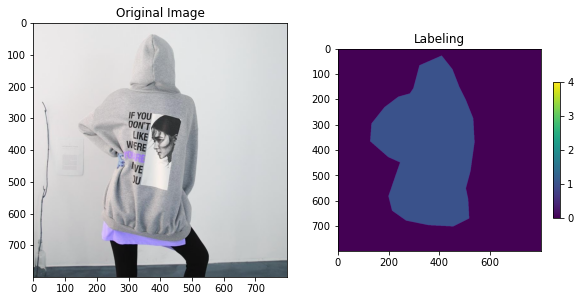

In [ ]:
# 리스트 형태 확인
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(dataset_list[0][0])
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(dataset_list[0][2])
plt.clim(0, 4)
plt.colorbar(shrink=0.5)
plt.title("Labeling")

plt.show()

## 원본 이미지에 마스크 적용하여 저장

### 테스트

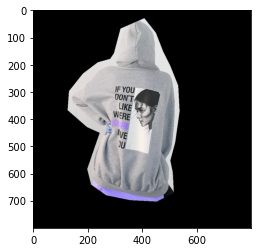

In [ ]:
# 마스크를 원본 이미지에 적용
sample_img_poly_crop = cv2.bitwise_and(dataset_list[0][0], dataset_list[0][0], mask=dataset_list[0][2])

plt.imshow(sample_img_poly_crop)
plt.show()

In [ ]:
# 렉트 좌표 자르기 테스트

x1 = int(dataset_list[0][1]['Img_Width'])
y1 = int(dataset_list[0][1]['Img_Height'])
x2 = 0
y2 = 0

for y in range(0, dataset_list[0][1]['Img_Height']):
    for x in range(0, dataset_list[0][1]['Img_Width']):
        if dataset_list[0][2][y][x] == 1:
            if x < x1:
                x1 = x
            elif x > x2:
                x2 = x

            if y < y1:
                y1 = y
            elif y > y2:
                y2 = y


print(x1, x2, y1, y2)

127 537 30 702


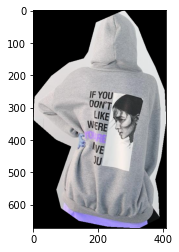

In [ ]:
# 렉트 좌표 자르기 테스트

x = x1
y = y1
w = x2-x1
h = y2-y1

sample_img_rect_crop = sample_img_poly_crop[y:y+h, x:x+w]
plt.imshow(sample_img_rect_crop)
plt.show()

### 전체 적용

In [ ]:
for i in range(0, len(dataset_list)):

    if (i%100) == 0: # 진행도 확인용
        print(str(i+1) + "번째 이미지 작업중...")


    dataset_list[i][0] = cv2.bitwise_and(dataset_list[i][0], dataset_list[i][0], mask=dataset_list[i][2])

    x1 = int(dataset_list[i][1]['Img_Width'])
    y1 = int(dataset_list[i][1]['Img_Height'])
    x2 = 0
    y2 = 0

    for y in range(0, dataset_list[i][1]['Img_Height']):
        for x in range(0, dataset_list[i][1]['Img_Width']):
            if dataset_list[i][2][y][x] == 1:
                if x < x1:
                    x1 = x
                elif x > x2:
                    x2 = x

                if y < y1:
                    y1 = y
                elif y > y2:
                    y2 = y

    x = x1
    y = y1
    w = x2-x1
    h = y2-y1

    dataset_list[i][0] = dataset_list[i][0][y:y+h, x:x+w]


print("Complete")

1번째 이미지 작업중...
101번째 이미지 작업중...
201번째 이미지 작업중...
Complete


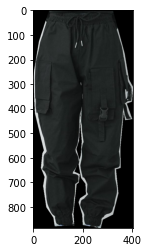

In [ ]:
plt.imshow(dataset_list[2][0])
plt.show()

# 이미지 크기 조정

## 조정 후 이미지 출력 테스트

In [ ]:
res_img_sample = cv2.resize(dataset_list[0][0], dsize=(res_height, res_width), interpolation=cv2.INTER_AREA)

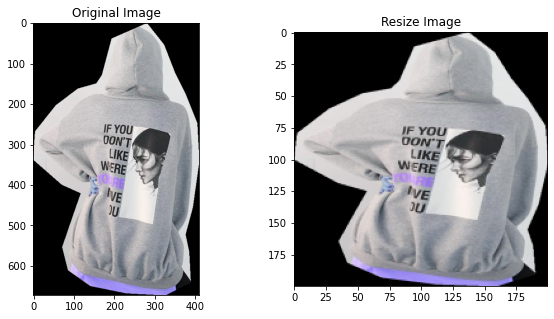

In [ ]:
# 리스트 형태 확인
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(dataset_list[0][0])
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(res_img_sample)
plt.title("Resize Image")

plt.show()

## 전체 이미지 크기 조정

In [ ]:
for data in dataset_list:
    data[0] = cv2.resize(data[0], dsize=(res_height, res_width), interpolation=cv2.INTER_AREA)

print("Complete")

Complete


# 변경된 이미지에 맞추어 Json 파일값 조정

## 이미지 Width, Height 정보 수정

In [ ]:
dataset_list[0][1].keys()

dict_keys(['Img_Width', 'Img_Height', 'Rect_Seg', 'Poly_Seg'])

In [ ]:
for data in dataset_list:
    data[1]['Img_Width'] = res_width
    data[1]['Img_Height'] = res_height

print("Complete")

Complete


## 패션 라벨링 정보 추가

In [ ]:
for data in dataset_list:
    data[1]['Labeling'] = 'Subculture'

In [ ]:
dataset_list[0][1]

{'Img_Width': 200,
 'Img_Height': 200,
 'Rect_Seg': {'Top': {'X': 127.203, 'Y': 29.5, 'Width': 410, 'Height': 672}},
 'Poly_Seg': {'Top': [[245, 450],
   [226, 504],
   [199, 583],
   [213, 640],
   [268, 679],
   [357, 697],
   [453, 702],
   [516, 671],
   [512, 595],
   [503, 552],
   [521, 485],
   [537, 371],
   [532, 277],
   [504, 207],
   [478, 155],
   [450, 83],
   [408, 30],
   [321, 68],
   [297, 158],
   [283, 179],
   [237, 192],
   [183, 233],
   [132, 297],
   [127, 367],
   [198, 429]]},
 'Labeling': 'Subculture'}

# Train-Test Split

In [ ]:
# 8:2 비율로 train-test split
train, val = train_test_split(dataset_list, test_size=0.2) # stratify, random_state 설정 가능

In [ ]:
len(train)

200

In [ ]:
len(val)

50

# 학습용 데이터를 X와 Y(Json)로 구분

In [ ]:
x_train = []
y_train = []

for data in train:
    x_train.append(data[0])
    y_train.append(data[1])

print("Complete")

Complete


In [ ]:
x_val = []
y_val = []

for data in val:
    x_val.append(data[0])
    y_val.append(data[1])

print("Complete")

Complete


# 학습용 데이터를 폴더에 저장

In [ ]:
i = train_save_point

for img in x_train:
    success = cv2.imwrite(train_dir_name + "Image/" + str(i) + ".jpg", img)

    if not success:
        print("Image Save Failed!!")
        break

    i = i+1

print("Complete")

Complete


In [ ]:
i = train_save_point

for json_file in y_train:
    json_path = train_dir_name + "Json/" + str(i) + ".json"

    with open(json_path, 'w') as outfile:
        json.dump(json_file, outfile)

    if not os.path.isfile(json_path): # 파일 저장에 실패했을 경우
        print("Json Save Failed!!")
        break

    i = i+1

    train_end_point = i

print("Complete")

Complete


In [ ]:
i = val_save_point

for img in x_val:
    success = cv2.imwrite(val_dir_name + "Image/" + str(i) + ".jpg", img)

    if not success:
        print("Image Save Failed!!")
        break

    i = i+1

print("Complete")

Complete


In [ ]:
i = val_save_point

for json_file in y_val:
    json_path = val_dir_name + "Json/" + str(i) + ".json"

    with open(json_path, 'w') as outfile:
        json.dump(json_file, outfile)

    if not os.path.isfile(json_path): # 파일 저장에 실패했을 경우
        print("Json Save Failed!!")
        break

    i = i+1

    val_end_point = i

print("Complete")

Complete


In [ ]:
print(train_end_point)

7998


In [ ]:
print(val_end_point)

2004


# 실제 폴더 확인